In [4]:
import pyaudio
import wave
 
def record_audio(s = 10):
    FORMAT = pyaudio.paInt16
    CHANNELS = 2
    RATE = 44100
    CHUNK = 1024
    RECORD_SECONDS = s
    WAVE_OUTPUT_FILENAME = "recorded_tracks/file.wav"

    audio = pyaudio.PyAudio()

    # start Recording
    stream = audio.open(format=FORMAT, channels=CHANNELS,
                    rate=RATE, input=True,
                    frames_per_buffer=CHUNK)
    print "recording..."
    frames = []

    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(data)
    print "finished recording"


    # stop Recording
    stream.stop_stream()
    stream.close()
    audio.terminate()

    waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
    waveFile.setnchannels(CHANNELS)
    waveFile.setsampwidth(audio.get_sample_size(FORMAT))
    waveFile.setframerate(RATE)
    waveFile.writeframes(b''.join(frames))
    waveFile.close()

In [1]:
from python_speech_features import mfcc
from python_speech_features import delta
from python_speech_features import logfbank
import scipy.io.wavfile as wav

(rate,sig) = wav.read("file.wav")
mfcc_feat = mfcc(sig,rate)
d_mfcc_feat = delta(mfcc_feat, 2)
fbank_feat = logfbank(sig,rate)

print(fbank_feat[1:3,:])

[[  6.95091995   5.35732194   5.1359727    5.52241694   5.68098785
    5.34499873   6.95448982   5.50014242   7.47085077   7.67661186
    7.67911676   6.85834725   7.37673975   6.80896624   6.72371977
    6.86780677   6.88132168   6.98837003   7.97793584   8.83866463
   11.09968132  11.54340127  10.38112955   8.05182133   6.82390095
    6.74209364]
 [  7.18596234   5.84356757   5.50956987   5.48709662   7.31454808
    6.33296414   6.19625976   7.60526543   7.26160714   7.33428741
    7.80307308   6.85808465   6.72973329   6.91522876   7.23752008
    7.59041109   6.6353545    6.75593939   7.67268181   8.4286928
   11.09546254  11.83067293  10.23628378   7.30776      6.25070356
    5.68377337]]


In [71]:
import sys, aubio
import sys
from aubio import source, pvoc, mfcc
from numpy import vstack, zeros, diff

n_filters = 40              # must be 40 for mfcc
n_coeffs = 13
source_filename = "file.wav"

samplerate = 0
win_s = 512
hop_s = win_s // 4
mode = "ddelta"

s = source(source_filename, samplerate, hop_s)
samplerate = s.samplerate

In [78]:
s.duration / s.samplerate / 3

3

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: AUBIO WARNING: Nyquist frequency is 500.000000Hz, but highest frequency band ends at 6853.844727Hz
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: AUBIO WARNING: source_avcodec: no sample found while converting frame (file.wav)
  


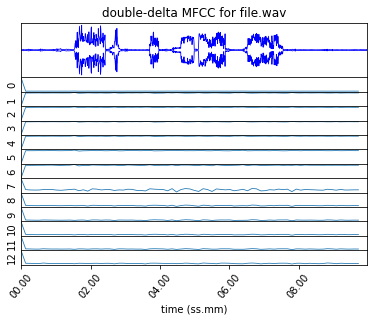

In [70]:

p = pvoc(win_s, hop_s)
m = mfcc(win_s, n_filters, n_coeffs, samplerate)

mfccs = zeros([n_coeffs,])
frames_read = 0
while True:
    samples, read = s()
    #print(samples, read)
    spec = p(samples)
    mfcc_out = m(spec)
    mfccs = vstack((mfccs, mfcc_out))
    frames_read += read
    if read < hop_s: break

# do plotting
from numpy import arange
from demo_waveform_plot import get_waveform_plot
from demo_waveform_plot import set_xlabels_sample2time
import matplotlib.pyplot as plt

fig = plt.figure()
plt.rc('lines',linewidth='.8')
wave = plt.axes([0.1, 0.75, 0.8, 0.19])

get_waveform_plot( source_filename, samplerate, block_size = hop_s, ax = wave)
wave.xaxis.set_visible(False)
wave.yaxis.set_visible(False)

# compute first and second derivatives
if mode in ["delta", "ddelta"]:
    mfccs = diff(mfccs, axis = 0)
if mode == "ddelta":
    mfccs = diff(mfccs, axis = 0)

all_times = arange(mfccs.shape[0]) * hop_s
n_coeffs = mfccs.shape[1]
for i in range(n_coeffs):
    ax = plt.axes ( [0.1, 0.75 - ((i+1) * 0.65 / n_coeffs),  0.8, 0.65 / n_coeffs], sharex = wave )
    ax.xaxis.set_visible(False)
    ax.set_yticks([])
    ax.set_ylabel('%d' % i)
    ax.plot(all_times, mfccs.T[i])

# add time to the last axis
set_xlabels_sample2time( ax, frames_read, samplerate)

#plt.ylabel('spectral descriptor value')
ax.xaxis.set_visible(True)
title = 'MFCC for %s' % source_filename
if mode == "delta": title = mode + " " + title
elif mode == "ddelta": title = "double-delta" + " " + title
wave.set_title(title)
plt.show()

In [66]:
dir(s)
s.duration

440319

In [14]:
mfccs.shape

(3440, 13)

In [67]:
frames_read

440320L

In [60]:
s.duration

440319

0.000000 0.000000 0.000000
0.011610 0.000000 0.000000
0.023220 0.000000 0.000000
0.034830 0.000000 0.000000
0.046440 138.305771 0.451393
0.058050 138.223557 0.492258
0.069660 138.198593 0.512149
0.081270 138.255295 0.490553
0.092880 138.197983 0.520660
0.104490 138.222076 0.511804
0.116100 138.214020 0.505018
0.127710 138.095642 0.557636
0.139320 138.038406 0.578380
0.150930 137.937439 0.623190
0.162540 138.223083 0.516468
0.174150 138.792358 0.354954
0.185760 0.000000 0.348520
0.197370 138.866959 0.337190
0.208980 138.428452 0.461144
0.220590 137.902603 0.655792
0.232200 137.833893 0.697583
0.243810 137.821579 0.701670
0.255420 45.463799 0.231027
0.267029 42.578125 0.096042
0.278639 87.139999 0.006058
0.290249 16.774033 0.311572
0.301859 26.810360 0.311572
0.313469 27.917513 0.311572
0.325079 27.949490 0.311572
0.336689 138.000839 0.609060
0.348299 137.949387 0.626312
0.359909 137.920319 0.610263
0.371519 111.378403 0.537827
0.383129 111.012115 0.576811
0.394739 111.014740 0.565687
0.

7.418776 57.613052 0.877374
7.430385 56.322075 0.877374
7.441995 56.202370 0.877374
7.453605 43.146465 0.717166
7.465215 42.342987 0.646731
7.476825 41.811501 0.677437
7.488435 41.377018 0.695083
7.500045 41.580021 0.714481
7.511655 42.613365 0.714481
7.523265 43.135468 0.771096
7.534875 43.429977 0.771096
7.546485 43.790352 0.771096
7.558095 44.060822 0.771096
7.569705 56.582710 0.771096
7.581315 56.669632 0.771096
7.592925 56.886581 0.771096
7.604535 57.649353 0.771096
7.616145 57.723244 0.771096
7.627755 139.387131 0.771096
7.639365 138.916779 0.771096
7.650975 138.620544 0.771096
7.662585 138.458527 0.771096
7.674195 138.462830 0.771096
7.685805 138.321503 0.771096
7.697415 138.252579 0.771096
7.709025 138.131607 0.771096
7.720635 137.995834 0.771096
7.732245 138.014908 0.771096
7.743855 138.023697 0.771096
7.755465 138.059097 0.771096
7.767075 138.093536 0.771096
7.778685 138.083710 0.771096
7.790295 138.051407 0.771096
7.801905 138.041641 0.771096
7.813515 138.003418 0.771096
7.8

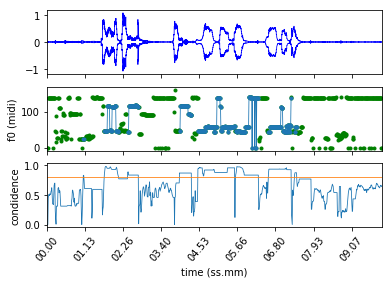

In [18]:
import sys
from aubio import source, pitch

filename = source_filename
downsample = 1
samplerate = 44100 // downsample

win_s = 4096 // downsample # fft size
hop_s = 512  // downsample # hop size

s = source(filename, samplerate, hop_s)
samplerate = s.samplerate

tolerance = 0.8

pitch_o = pitch("yin", win_s, hop_s, samplerate)
pitch_o.set_unit("midi")
pitch_o.set_tolerance(tolerance)

pitches = []
confidences = []

# total number of frames read
total_frames = 0
while True:
    samples, read = s()
    pitch = pitch_o(samples)[0]
    #pitch = int(round(pitch))
    confidence = pitch_o.get_confidence()
    #if confidence < 0.8: pitch = 0.
    print("%f %f %f" % (total_frames / float(samplerate), pitch, confidence))
    pitches += [pitch]
    confidences += [confidence]
    total_frames += read
    if read < hop_s: break

if 0: sys.exit(0)

#print pitches
import os.path
from numpy import array, ma
import matplotlib.pyplot as plt
from demo_waveform_plot import get_waveform_plot, set_xlabels_sample2time

skip = 1

pitches = array(pitches[skip:])
confidences = array(confidences[skip:])
times = [t * hop_s for t in range(len(pitches))]

fig = plt.figure()

ax1 = fig.add_subplot(311)
ax1 = get_waveform_plot(filename, samplerate = samplerate, block_size = hop_s, ax = ax1)
plt.setp(ax1.get_xticklabels(), visible = False)
ax1.set_xlabel('')

def array_from_text_file(filename, dtype = 'float'):
    filename = os.path.join(os.path.dirname(__file__), filename)
    return array([line.split() for line in open(filename).readlines()],
        dtype = dtype)

ax2 = fig.add_subplot(312, sharex = ax1)
ground_truth = os.path.splitext(filename)[0] + '.f0.Corrected'
if os.path.isfile(ground_truth):
    ground_truth = array_from_text_file(ground_truth)
    true_freqs = ground_truth[:,2]
    true_freqs = ma.masked_where(true_freqs < 2, true_freqs)
    true_times = float(samplerate) * ground_truth[:,0]
    ax2.plot(true_times, true_freqs, 'r')
    ax2.axis( ymin = 0.9 * true_freqs.min(), ymax = 1.1 * true_freqs.max() )
# plot raw pitches
ax2.plot(times, pitches, '.g')
# plot cleaned up pitches
cleaned_pitches = pitches
#cleaned_pitches = ma.masked_where(cleaned_pitches < 0, cleaned_pitches)
#cleaned_pitches = ma.masked_where(cleaned_pitches > 120, cleaned_pitches)
cleaned_pitches = ma.masked_where(confidences < tolerance, cleaned_pitches)
ax2.plot(times, cleaned_pitches, '.-')
#ax2.axis( ymin = 0.9 * cleaned_pitches.min(), ymax = 1.1 * cleaned_pitches.max() )
#ax2.axis( ymin = 55, ymax = 70 )
plt.setp(ax2.get_xticklabels(), visible = False)
ax2.set_ylabel('f0 (midi)')

# plot confidence
ax3 = fig.add_subplot(313, sharex = ax1)
# plot the confidence
ax3.plot(times, confidences)
# draw a line at tolerance
ax3.plot(times, [tolerance]*len(confidences))
ax3.axis( xmin = times[0], xmax = times[-1])
ax3.set_ylabel('condidence')
set_xlabels_sample2time(ax3, times[-1], samplerate)
plt.show()